In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score,accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.linear_model import LogisticRegression

In [35]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [37]:
import networkx 

In [3]:
import pandas as pd
tx = pd.read_csv('new_data/df_tx.csv')
tx.drop('Unnamed: 0',axis=1,inplace=True)

In [33]:
my_palette = ['#33576E','#741102','#498B6D']

# Set the color palette for matplotlib
#plt.style.use(['dark_background'])
plt.style.use(['default'])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_palette)

In [4]:

tx = tx.dropna()
tx['class'].replace(2,0,inplace=True)

In [5]:
tx.shape

(46045, 185)

In [6]:
tx_e = pd.read_csv('data/txs_edgelist.csv')

In [32]:
all_tx_central = pd.read_csv('tx_with_central.csv')
tx_central = all_tx_central[all_tx_central['class']!=3]

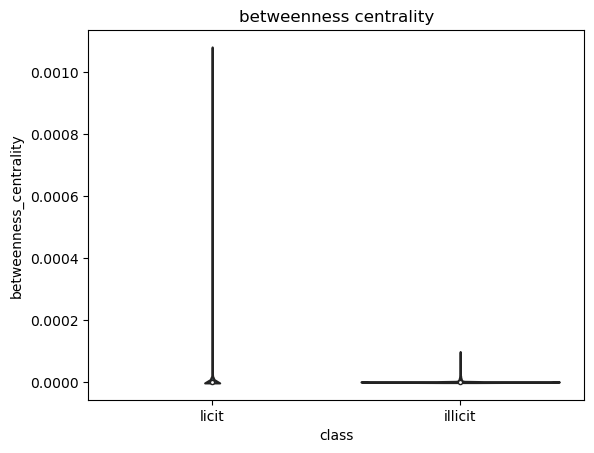

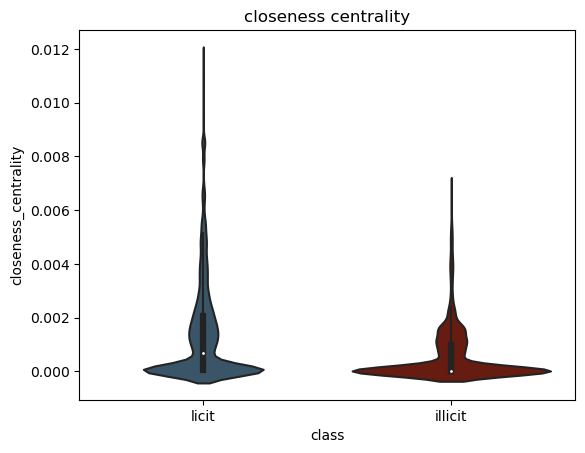

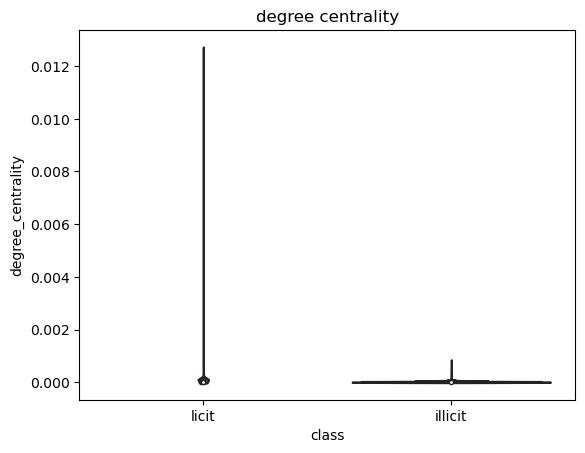

In [36]:
tx_central['class'].replace(2,0,inplace=True)
for c in ['betweenness_centrality', 'closeness_centrality', 'degree_centrality']:
    plt.title(c.replace('_',' '))
    sns.violinplot(x='class',y=c,data=tx_central)
    plt.xticks([0,1],['licit','illicit'])
    plt.show()

In [8]:

for column in tx.columns[2:184]:
    feature = np.array(tx[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    tx[column] = feature_scaled.reshape(1,-1)[0]

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
234350,158365409,157930723
234351,188708874,188708879
234352,157659064,157659046
234353,87414554,106877725


In [10]:
# prompt: sort mergedf_txs_features  with time step and give me the index range from time step 1-39
sorted_df = tx.sort_values(by=['Time step'])
index_train = sorted_df[sorted_df['Time step'].between(1, 34)].index.tolist()

train = tx.iloc[index_train]
test = tx.drop(index=index_train)
print('train shape: ',train.shape[0],'\ntest shape: ',test.shape[0])

train_data_y = train['class']
train_data_x = train.drop(['class','txId','Time step'],axis=1)
test_data_y = test['class']
test_data_x = test.drop(['class','txId','Time step'],axis=1)


y_train = train['class']
X_train = train.drop(['class','txId','Time step'],axis=1)
y_test = test['class']
X_test = test.drop(['class','txId','Time step'],axis=1)


train shape:  29699 
test shape:  16346


In [11]:
train[train['class']==1].shape[0]

3462

In [12]:

train[train['class']==0].shape[0]

26237

In [13]:
len(index_train)

29699

In [14]:

train = tx.iloc[index_train]
test = tx.drop(index=index_train)
print('train shape: ',train.shape[0],'\ntest shape: ',test.shape[0])

train shape:  29699 
test shape:  16346


In [15]:
print('train')
for col in train.columns:
    if train[col].isna().sum() != 0:
        print('\n',col)
        print(train[col].isna().sum())
        
print('test')
for col in test.columns:
    if test[col].isna().sum() != 0:
        print('\n',col)
        print(test[col].isna().sum())        

train
test


In [31]:
new_df = pd.concat([tx.iloc[:, :166], tx['class ']], axis=1)

KeyError: 'class '

In [30]:
tx.iloc[:, 184]

0        0
1        0
2        0
3        0
4        0
        ..
46040    0
46041    0
46042    0
46043    0
46044    0
Name: class, Length: 46045, dtype: int64

# LR


In [25]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.linear_model import LogisticRegression
# LOGISTIC REGRESSION (LR)
cLR = LogisticRegression(max_iter=1000).fit(X_train.values,y_train.values)
y_preds_LR = cLR.predict(X_test.values)
acc = accuracy_score(y_test.values, y_preds_LR)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_LR)
fpr, tpr, thersholds = roc_curve(y_test.values, y_preds_LR, pos_label=1)
roc_auc = auc(fpr, tpr)

print('auc_roc:%.3f'%roc_auc)
print("Logistic Regression")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_LR, average='micro')
print('Accuracy:',acc)
print("Micro-Average F1 Score: %.3f"%(micro_f1))

auc_roc:0.797
Logistic Regression
Precision: 0.250 
Recall: 0.754 
F1 Score: 0.375
Accuracy: 0.8334149027284963
Micro-Average F1 Score: 0.833


# RF

In [17]:
from sklearn.metrics import roc_curve,auc
# RANDOM FOREST (RF)
cRF = RandomForestClassifier(n_estimators=50,random_state=42).fit(X_train.values,y_train.values)
y_preds_RF = cRF.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_RF)

fpr, tpr, thersholds = roc_curve(y_test.values, y_preds_RF, pos_label=1)
roc_auc = auc(fpr, tpr)

print('auc_roc:%.3f'%roc_auc)

print("Random Forest")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_RF, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

auc_roc:0.859
Random Forest
Precision: 0.963 
Recall: 0.719 
F1 Score: 0.823
Micro-Average F1 Score: 0.980


## 

In [18]:
# # prompt: build random forest for classifier question between two class(1 and 2) and evaluate the model result with f1, recall,percision

# # Train the random forest classifier
# clf100 = RandomForestClassifier(n_estimators=50,random_state=42)
# clf100.fit(train_data_x, train_data_y)

# # Make predictions on the test set
# y_pred_rf = clf100.predict(test_data_x)

# # Evaluate the model
# f1 = f1_score(test_data_y, y_pred_rf , average='binary', pos_label=1)
# recall = recall_score(test_data_y, y_pred_rf , average='binary', pos_label=1)
# precision = precision_score(test_data_y, y_pred_rf , average='binary', pos_label=1)
# rf_xgb = accuracy_score(test_data_y, y_pred_rf)

# print("F1 score:", f1)
# print("Recall:", recall)
# print("Precision:", precision)
# print('Accuracy:',rf_xgb)



0.000000 0.000000 inf
0.001966 0.719298 1.000000
1.000000 1.000000 0.000000


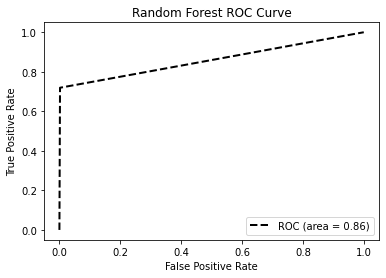

In [19]:

 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thersholds = roc_curve(test_data_y,y_preds_RF, pos_label=1)

for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


# XG

In [20]:
!pip install xgboost

In [21]:
from xgboost import XGBClassifier
# Build XGBClassifier model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(train_data_x, train_data_y)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(test_data_x)

# Evaluate the model
f1_xgb = f1_score(test_data_y, y_pred_xgb, average='binary', pos_label=1)
recall_xgb = recall_score(test_data_y, y_pred_xgb, average='binary', pos_label=1)
precision_xgb = precision_score(test_data_y, y_pred_xgb, average='binary', pos_label=1)
acc_xgb = accuracy_score(test_data_y, y_pred_xgb)
fpr, tpr, thersholds = roc_curve(y_test.values, y_pred_xgb, pos_label=1)
roc_auc = auc(fpr, tpr)

print('auc_roc:%.3f'%roc_auc)
print("XGBClassifier Results:")
print("F1 score:", f1_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("Accuracy:",acc_xgb)

auc_roc:0.864
XGBClassifier Results:
F1 score: 0.8125
Recall: 0.7322253000923361
Precision: 0.9125431530494822
Accuracy: 0.9776092010277744


0.000000 0.000000 inf
0.004979 0.732225 1.000000
1.000000 1.000000 0.000000


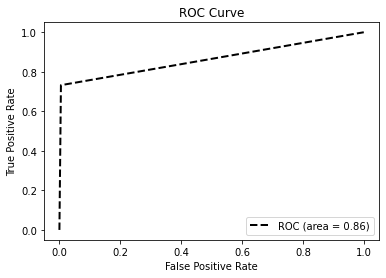

In [22]:

 

fpr, tpr, thersholds = roc_curve(y_test, y_pred_xgb , pos_label=1)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# SVM

In [24]:
# prompt: build svm binary classification problem and evaluate f1, acc, recall and percision

from sklearn import svm


clf = svm.SVC()#kernel='rbf', gamma='scale', decision_function_shape='ovo'

# Fit the classifier to the training data
clf.fit(train_data_x, train_data_y)

# Predict the labels of the test data
y_pred = clf.predict(test_data_x)

# Evaluate the performance of the classifier
f1 = f1_score(test_data_y, y_pred, average='binary', pos_label=1)
recall = recall_score(test_data_y, y_pred, average='binary', pos_label=1)
precision = precision_score(test_data_y, y_pred, average='binary', pos_label=1)
acc = accuracy_score(test_data_y, y_pred)
fpr, tpr, thersholds = roc_curve(y_test.values, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

print('auc_roc:%.3f'%roc_auc)
# Print the performance metrics
print(f'Accuracy: {acc :.4f}')
print(f'Recall: {recall :.4f}')
print(f'F1: {f1 :.4f}')
print(f'Precision: {precision :.4f}')


# def drawROC(test_y,y_pred):
#     fpr, tpr, thersholds = roc_curve(test_y,y_pred, pos_label=1)
#     roc_auc = auc(fpr, tpr)
 
#     plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
    
#     plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
#     plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')  
#     plt.title('ROC Curve')
#     plt.legend(loc="lower right")
#     plt.show()
    
    
# # Draw ROC curve
# drawROC(test_data_y, y_pred)



auc_roc:0.840
Accuracy: 0.9642
Recall: 0.6971
F1: 0.7208
Precision: 0.7460
